In [1]:
import glob
import pandas as pd
#outputs = []
#RagOverArXiv/data/pdfs_ws_mrkp_test/eval_outputs
pdf_files = glob.glob("../data/pdfs_ws_mrkp_test/eval_outputs/pdf*.csv")
txt_files = glob.glob("../data/pdfs_ws_mrkp_test/eval_outputs/txt*.csv")
all_files = pdf_files+txt_files
result = pd.DataFrame()#index=list(all_files.index))
for file_path in all_files:
    print(file_path)
    output = pd.read_csv(file_path)
    print(output.shape)
    output["settings"] = file_path.split('/')[-1]
    result = pd.concat([result,output])
print(result.shape)
pd.set_option('display.max_colwidth',500)
result[['eval_score','settings']].head(25)

../data/pdfs_ws_mrkp_test/eval_outputs/pdf_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_Rerank.csv
(77, 15)
../data/pdfs_ws_mrkp_test/eval_outputs/pdf_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_NoRerank.csv
(9, 15)
../data/pdfs_ws_mrkp_test/eval_outputs/pdf_2000_200_mxbai-embe_CriticMixtral-8x_QagenMixtral-8x_NoRerank.csv
(7, 15)
../data/pdfs_ws_mrkp_test/eval_outputs/pdf_1000_200_mxbai-embe_CriticMixtral-8x_QagenMixtral-8x_Rerank.csv
(47, 15)
../data/pdfs_ws_mrkp_test/eval_outputs/pdf_2000_200_mxbai-embe_CriticMixtral-8x_QagenMixtral-8x_Rerank.csv
(55, 15)
../data/pdfs_ws_mrkp_test/eval_outputs/pdf_4000_200_mxbai-embe_CriticMixtral-8x_QagenMixtral-8x_Rerank.csv
(56, 15)
../data/pdfs_ws_mrkp_test/eval_outputs/txt_2000_200_mxbai-embe_CriticMixtral-8x_QagenMixtral-8x_NoRerank.csv
(5, 15)
../data/pdfs_ws_mrkp_test/eval_outputs/txt_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_Rerank.csv
(84, 15)
../data/pdfs_ws_mrkp_test/eval_outputs/txt_4000_200_mxbai-embe_Critic

,eval_score,settings
0,5.0,pdf_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_Rerank.csv
1,5.0,pdf_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_Rerank.csv
2,5.0,pdf_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_Rerank.csv
3,5.0,pdf_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_Rerank.csv
4,2.0,pdf_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_Rerank.csv
5,4.0,pdf_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_Rerank.csv
6,1.0,pdf_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_Rerank.csv
7,3.0,pdf_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_Rerank.csv
8,1.0,pdf_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_Rerank.csv
9,5.0,pdf_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_Rerank.csv


In [2]:
result[result.settings=='pdf_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_Rerank.csv'].eval_score.value_counts()

eval_score
5.0    37
1.0    14
4.0     6
3.0     6
2.0     4
Name: count, dtype: int64

In [3]:
result.columns
result[['eval_score','settings','eval_feedback']].head(2)

,eval_score,settings,eval_feedback
0,5.0,pdf_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_Rerank.csv,"The response correctly identifies the term that penalizes the difference between the action logit and next state value as 2[V(si)−γV(si+1)]|{z}. This is a critical aspect of the loss function J(ℓθ) in equation (6), and its correct identification demonstrates a deep understanding of the topic. So the overall score is 5.\n\nSo the score is 5."
1,5.0,pdf_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_Rerank.csv,"The response accurately explains how the choice of odds ratio over probability ratio affects the stability of preference alignment in a generative model. It correctly identifies the odds ratio as a better choice because it is less discriminatory towards the disfavored response. This response aligns with the reference answer and is completely correct, accurate, and factual. So the overall score is 5."


In [4]:
print(result['eval_score'].unique())

[ 5.  2.  4.  1.  3. nan]


In [5]:
result.shape

(544, 16)

In [6]:
result_orig = result.copy()

In [7]:

result = result.dropna(subset=['eval_score'])

In [8]:
any(result.eval_score.isna())

False

In [9]:
# import numpy as np
# result["eval_score"] = result["eval_score"].apply(
#     lambda x: x if not pd.isna(x) else 1
# )
# result["eval_score"] = (result["eval_score"] - 1) / 4

In [10]:
import numpy as np
result["eval_score"] = result["eval_score"].apply(
    lambda x: x if not pd.isna(x) else 1
)
result["eval_score"] = 100*(result["eval_score"] - 1) / 4

In [11]:
result.eval_score.head()

0    100.0
1    100.0
2    100.0
3    100.0
4     25.0
Name: eval_score, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


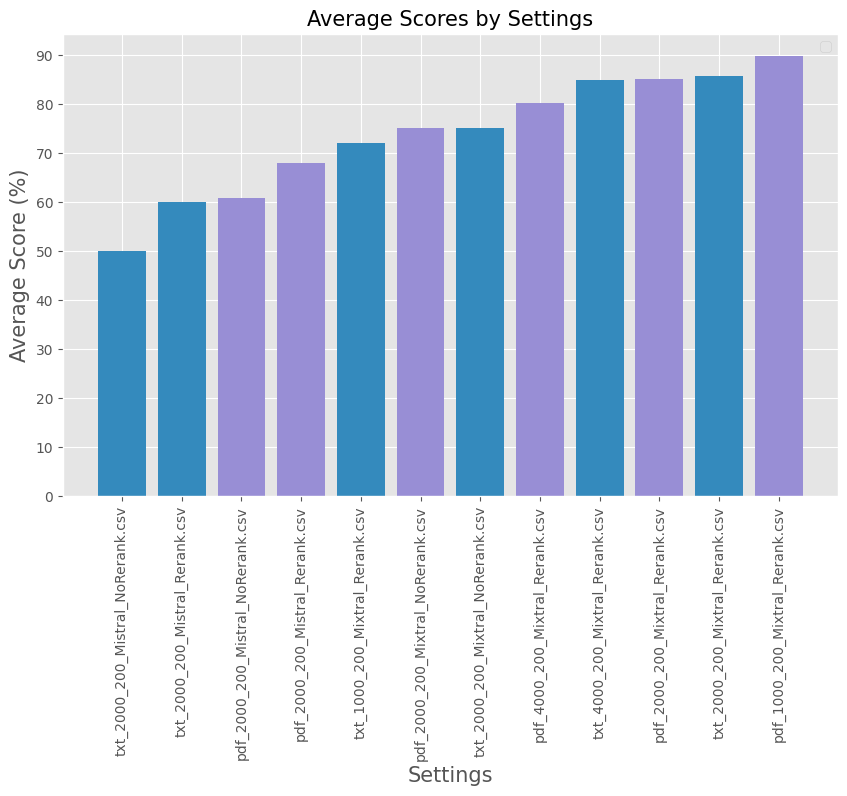

In [12]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Calculate the average scores and sort them
average_scores = result.groupby("settings")["eval_score"].mean().sort_values()
average_scores.index = average_scores.index.str.replace('CriticMiStralInf_QagenMiStralInf','Mistral')
average_scores.index = average_scores.index.str.replace('CriticMixtral-8x_QagenMixtral-8x','Mixtral')
average_scores.index = average_scores.index.str.replace('mxbai-embe_','')

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = [color_cycle[1] if label.startswith('txt') else color_cycle[2] for label in average_scores.index]
# Create the bar plot
plt.figure(figsize=(10, 6))
#labels = [f"{name.split('_')[0]}_{name.split('_')[1]}_{name.split('_')[-1].split('.')[0]}" for name in average_scores.index]
#plt.bar(labels, average_scores.values,color=color_cycle[1:3])
plt.bar(average_scores.index, average_scores.values,color=colors)

# Set the plot title and labels
plt.title("Average Scores by Settings", fontsize=15)
plt.xlabel("Settings", fontsize=15)
plt.ylabel("Average Score (%)", fontsize=15)

# Rotate the x-axis labels if they overlap
plt.xticks(rotation=90)
plt.yticks(range(0,int(average_scores.max())+10,10))
plt.legend()
# Show the plot
plt.show()

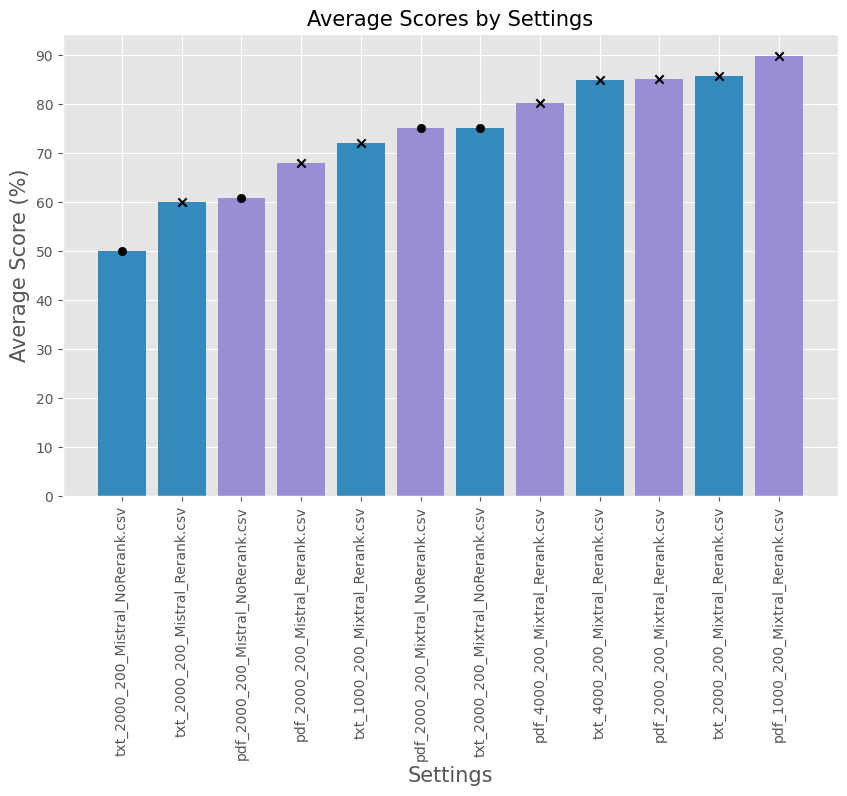

In [13]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Calculate the average scores and sort them
average_scores = result.groupby("settings")["eval_score"].mean().sort_values()
average_scores.index = average_scores.index.str.replace('CriticMiStralInf_QagenMiStralInf','Mistral')
average_scores.index = average_scores.index.str.replace('CriticMixtral-8x_QagenMixtral-8x','Mixtral')
average_scores.index = average_scores.index.str.replace('mxbai-embe_','')

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = [color_cycle[1] if label.startswith('txt') else color_cycle[2] for label in average_scores.index]

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(average_scores.index, average_scores.values, color=colors)

# Add markers on top of the bars
for bar, label in zip(bars, average_scores.index):
    if 'NoRerank' in label:
        plt.scatter(bar.get_x() + bar.get_width() / 2, bar.get_height(), marker='o', color='black')
    elif 'Rerank' in label:
        plt.scatter(bar.get_x() + bar.get_width() / 2, bar.get_height(), marker='x', color='black')

# Set the plot title and labels
plt.title("Average Scores by Settings", fontsize=15)
plt.xlabel("Settings", fontsize=15)
plt.ylabel("Average Score (%)", fontsize=15)

# Rotate the x-axis labels if they overlap
plt.xticks(rotation=90)
plt.yticks(range(0,int(average_scores.max())+10,10))

# Show the plot
plt.show()

In [15]:
# Add a new column 'id' that contains a unique identifier for each row
result['id'] = range(len(result))

# Create the eval_scores Series
eval_scores = pd.Series(result["eval_score"].values, index=result["id"])

In [16]:
average_scores

settings
txt_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_NoRerank.csv    50.000000
txt_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_Rerank.csv      60.000000
pdf_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_NoRerank.csv    60.714286
pdf_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_Rerank.csv      67.910448
txt_1000_200_mxbai-embe_CriticMixtral-8x_QagenMixtral-8x_Rerank.csv      72.083333
pdf_2000_200_mxbai-embe_CriticMixtral-8x_QagenMixtral-8x_NoRerank.csv    75.000000
txt_2000_200_mxbai-embe_CriticMixtral-8x_QagenMixtral-8x_NoRerank.csv    75.000000
pdf_4000_200_mxbai-embe_CriticMixtral-8x_QagenMixtral-8x_Rerank.csv      80.102041
txt_4000_200_mxbai-embe_CriticMixtral-8x_QagenMixtral-8x_Rerank.csv      84.905660
pdf_2000_200_mxbai-embe_CriticMixtral-8x_QagenMixtral-8x_Rerank.csv      85.000000
txt_2000_200_mxbai-embe_CriticMixtral-8x_QagenMixtral-8x_Rerank.csv      85.714286
pdf_1000_200_mxbai-embe_CriticMixtral-8x_QagenMixtral-8x_Rerank.csv      89.77